In [9]:
import numpy as np

C = np.array(
    [
        [1,0,0,0,0,0,0],
        [0,0,1,0,0,0,0],
        [0,0,0,0,0,0,1]
    ]
)
W = np.random.randn(7,3)

print(C.shape)
print(W.shape)

H = np.dot(C,W)

print(W)
print("--------------------------------")
print(H)

(3, 7)
(7, 3)
[[-0.93727138  1.23327515  0.96598404]
 [-0.78598058 -0.89601241  1.10360655]
 [-1.24651333  0.78129679 -0.38891129]
 [-0.2669198  -0.32870019 -0.99752049]
 [-0.18222859  0.8141227  -0.12923998]
 [-0.73579782 -1.6721033   0.245662  ]
 [ 1.02786948  1.88689943 -0.79861536]]
--------------------------------
[[-0.93727138  1.23327515  0.96598404]
 [-1.24651333  0.78129679 -0.38891129]
 [ 1.02786948  1.88689943 -0.79861536]]


In [10]:
import sys
sys.path.append('./deep')

import numpy as np
from common.layers import MatMul

C = np.array([[1,0,0,0,0,0,0]])
W = np.random.randn(7,3)

layer = MatMul(W)
H = layer.forward(C)

print(W)
print("--------------------------------")
print(H)


[[-0.75802339 -1.20437928  0.94514886]
 [ 0.59847914 -2.13153115 -1.92511249]
 [-3.13986583 -2.64334957  0.25422007]
 [-0.87524732  0.00556807  0.23124136]
 [ 0.72195231 -1.16130227  2.19811391]
 [-0.71104096  0.00474402  0.44923147]
 [ 0.33359552 -0.08368898  0.49457433]]
--------------------------------
[[-0.75802339 -1.20437928  0.94514886]]


In [11]:
import sys

sys.path.append('./deep')

import numpy as np
from common.layers import MatMul

C0 = np.array([[1,0,0,0,0,0,0]])
C1 = np.array([[0,0,1,0,0,0,0]])
W_in = np.random.randn(7,3)
W_out = np.random.randn(3,7)

in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)

h0 = in_layer0.forward(C0)
h1 = in_layer1.forward(C1)
h = 0.5 * (h0 + h1)
s = out_layer.forward(h)

print(h0)
print(h1)
print(h)
print("--------------------------------")
print(s)

[[ 1.06238389 -0.42560335  1.07169826]]
[[ 2.39650912  0.26528808 -0.33277131]]
[[ 1.7294465  -0.08015764  0.36946348]]
--------------------------------
[[ 2.32584991 -0.6032963  -0.68729432  1.84600388  3.08574584 -1.0652737
   0.86366443]]


In [12]:
import sys

sys.path.append('./deep')

from common.util import preprocess

text = "You say goodbye and I say hello."

corpus, word_to_id, id_to_word = preprocess(text)

print(corpus)
print(word_to_id)
print(id_to_word)

print("--------------------------------")

print(corpus[0])

[0 1 2 3 4 1 5 6]
{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}
--------------------------------
0


In [13]:
import numpy as np


def create_contexts_target(corpus, window_size=1):
    
    #시작과 끝에서 window_size만큼 빼고 나머지 배열
    target = corpus[window_size:-window_size]
    print("corpus: ", corpus)
    print("window_size: ", window_size)
    print("--------------------------------")
    
    print("target: ", target)
    
    contexts = []
    
    #시작과 끝에서 window_size만큼 빼고 나머지 배열을 순환하며 주변 단어 추출
    for idx in range(window_size, len(corpus) - window_size):
        cs = []
        
        for t in range(-window_size, window_size + 1):
            if t == 0:
                continue
            cs.append(corpus[idx + t])
        contexts.append(cs)
    return np.array(contexts), np.array(target)

# corpus == 토큰화된 숫자 배열
# window_size == 주변 단어 개수
contexts, target = create_contexts_target(corpus, window_size=1)

print(contexts)
print(target)

corpus:  [0 1 2 3 4 1 5 6]
window_size:  1
--------------------------------
target:  [1 2 3 4 1 5]
[[0 2]
 [1 3]
 [2 4]
 [3 1]
 [4 5]
 [1 6]]
[1 2 3 4 1 5]


In [14]:
def create_contexts_target(corpus, window_size=1):
    target = corpus[window_size:-window_size]
    contexts = []
    
    for idx in range(window_size, len(corpus) - window_size):
        # 한 줄로 해결!
        cs = corpus[idx-window_size:idx] + corpus[idx+1:idx+window_size+1]
        contexts.append(cs)
    
    return np.array(contexts), np.array(target)

In [15]:
import numpy as np
import sys

sys.path.append('./deep')

from common.util import preprocess, create_contexts_target, convert_one_hot

text = "You say goodbye and I say hello."

corpus, word_to_id, id_to_word = preprocess(text)

contexts, target = create_contexts_target(corpus, window_size=1)

vocab_size = len(word_to_id)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

print(target)
print("--------------------------------")
print(contexts)



[[0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]]
--------------------------------
[[[1 0 0 0 0 0 0]
  [0 0 1 0 0 0 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 1 0 0 0]]

 [[0 0 1 0 0 0 0]
  [0 0 0 0 1 0 0]]

 [[0 0 0 1 0 0 0]
  [0 1 0 0 0 0 0]]

 [[0 0 0 0 1 0 0]
  [0 0 0 0 0 1 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 0 0 0 1]]]


In [18]:
import sys

sys.path.append('./deep')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss

class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size
        
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')
        
        print("W_in: ", W_in)
        print("W_out: ", W_out)
        
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()
        
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        
        for layer in layers:
            self.params.append(layer.params)
            self.grads.append(layer.grads)
        self.word_vecs = W_in
    
    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        print("contexts: ", contexts)
        print("h0: ", h0)
        print("h1: ", h1)
        h = (h0 + h1) * 0.5
        print("h: ", h)
        s = self.out_layer.forward(h)
        l1 = self.loss_layer.forward(s, target)
        return l1

model = SimpleCBOW(7, 3)

W_in:  [[-0.0058632   0.01986563 -0.00293911]
 [ 0.00124806  0.01941454  0.0072104 ]
 [-0.00493019 -0.00030738  0.00587873]
 [-0.001779    0.00285993 -0.0050479 ]
 [ 0.01120101 -0.00396393  0.00530809]
 [-0.01743381 -0.01102825 -0.00350638]
 [-0.00049187 -0.00672346 -0.0143156 ]]
W_out:  [[ 0.01391175 -0.00326797 -0.02673007  0.01945324  0.00058983  0.01441755
   0.0057435 ]
 [ 0.00094626  0.00336376 -0.00186643 -0.00827637  0.00188436 -0.02136986
   0.0100541 ]
 [-0.00084606 -0.01291059  0.01135738 -0.01922367 -0.01011026  0.01373086
   0.01242591]]


In [ ]:
import sys

sys.path.append('./deep')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss

class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        # 임베딩 벡터의 크기
        V, H = vocab_size, hidden_size
        
        # 임베딩 벡터 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        # 출력 벡터 초기화
        W_out = 0.01 * np.random.randn(H, V).astype('f')
        
        # 임베딩 벡터 출력
        print("W_in: ", W_in)
        print("W_out: ", W_out)
        
        # 입력층 초기화
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        # 출력층 초기화
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()
        
        # 레이어 초기화
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        # 파라미터 초기화
        self.params, self.grads = [], []
        
        # 레이어 순회
        for layer in layers:
            # 파라미터 추가
            self.params.append(layer.params)
            # 그라디언트 추가
            self.grads.append(layer.grads)
        # 임베딩 벡터 출력
        self.word_vecs = W_in
    
    def forward(self, contexts, target):
        print("contexts: ", contexts)
        # 첫 번째 컨텍스트 단어 "you"
        print("contexts[:, 0]: ", contexts[:, 0])
        # 두 번째 컨텍스트 단어 "goodbye"
        print("contexts[:, 1]: ", contexts[:, 1])
        # 첫 번째 컨텍스트 단어 "you"에 대한 임베딩 벡터
        h0 = self.in_layer0.forward(contexts[:, 0])
        # 두 번째 컨텍스트 단어 "goodbye"에 대한 임베딩 벡터
        h1 = self.in_layer1.forward(contexts[:, 1])
        # 두 임베딩 벡터의 평균
        h = (h0 + h1) * 0.5
        # 출력층의 선형 변환
        s = self.out_layer.forward(h)
        # 손실 계산
        l1 = self.loss_layer.forward(s, target)
        # 손실 반환
        return l1

model = SimpleCBOW(7, 3)
print(
    model.forward(
        np.array([
            # 첫 번째 샘플
            [
                [1, 0, 0, 0, 0, 0, 0],  # 첫 번째 컨텍스트 단어 "you"
                [0, 0, 1, 0, 0, 0, 0]
            ], # 두 번째 컨텍스트 단어 "goodbye"
            
            # 두 번째 샘플  
            [
                [0, 1, 0, 0, 0, 0, 0],  # 첫 번째 컨텍스트 단어 "say"
                [0, 0, 0, 1, 0, 0, 0] # 두 번째 컨텍스트 단어 "and"
            ]
            
            # 세 번째 샘플
            [
                [0, 0, 1, 0, 0, 0, 0],  # 첫 번째 컨텍스트 단어 "goodbye"
                [0, 0, 0, 0, 1, 0, 0] # 두 번째 컨텍스트 단어 "i"
            ]
        ]), 
        np.array([1])
    )
)

W_in:  [[ 0.00037735 -0.00687266  0.01259889]
 [ 0.00131825 -0.01035927  0.01150215]
 [-0.00909427 -0.01013124 -0.01170447]
 [-0.00485848  0.00468542  0.00062559]
 [-0.00211625 -0.00492341 -0.00634238]
 [-0.00646193 -0.01096411 -0.00081955]
 [-0.00336175 -0.01144411 -0.00833584]]
W_out:  [[-8.1365574e-03 -4.1937716e-03  5.9430567e-03  1.5707407e-02
  -4.8468803e-05 -2.2207925e-02 -3.5967084e-03]
 [-3.7027395e-03 -1.1809230e-02  7.1543520e-03 -6.7594526e-03
  -3.5038753e-03  2.7743918e-03  1.5292357e-02]
 [-2.0999229e-03  1.7453538e-02 -1.0786929e-02  6.7043579e-03
  -4.3005683e-03  2.1917876e-03  2.5928895e-05]]
contexts:  [[[1 0 0 0 0 0 0]
  [0 0 1 0 0 0 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 1 0 0 0]]

 [[0 0 1 0 0 0 0]
  [0 0 0 0 1 0 0]]]
contexts[:, 0]:  [[1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]]
contexts[:, 1]:  [[0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]]
contexts:  [[[1 0 0 0 0 0 0]
  [0 0 1 0 0 0 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 1 0 0 0]]

 [[0 0 1 0 0 0 0]
  [0 0 0 0 1

In [ ]:
data = np.array([
    # 첫 번째 샘플
    [
        [1, 0, 0, 0, 0, 0, 0],  # 첫 번째 컨텍스트 단어 "you"
        [0, 0, 1, 0, 0, 0, 0]
    ], # 두 번째 컨텍스트 단어 "goodbye"
    
    # 두 번째 샘플  
    [
        [0, 1, 0, 0, 0, 0, 0],  # 첫 번째 컨텍스트 단어 "say"
        [0, 0, 0, 1, 0, 0, 0] # 두 번째 컨텍스트 단어 "and"
    ],
    
    # 세 번째 샘플
    [
        [0, 0, 1, 0, 0, 0, 0],  # 첫 번째 컨텍스트 단어 "goodbye"
        [0, 0, 0, 0, 1, 0, 0] # 두 번째 컨텍스트 단어 "i"
    ]
])

print(data[0])
print(data[0,0,0:3])

[[1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]]
[1 0 0]


In [ ]:
import sys

sys.path.append('./deep')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss

class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        # 임베딩 벡터의 크기
        V, H = vocab_size, hidden_size
        
        # 임베딩 벡터 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        # 출력 벡터 초기화
        W_out = 0.01 * np.random.randn(H, V).astype('f')
        
        # 임베딩 벡터 출력
        print("W_in: ", W_in)
        print("W_out: ", W_out)
        
        # 입력층 초기화
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        # 출력층 초기화
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()
        
        # 레이어 초기화
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        # 파라미터 초기화
        self.params, self.grads = [], []
        
        # 레이어 순회
        for layer in layers:
            # 파라미터 추가
            self.params.append(layer.params)
            # 그라디언트 추가
            self.grads.append(layer.grads)
        # 임베딩 벡터 출력
        self.word_vecs = W_in
    
    def forward(self, contexts, target):
        print("contexts: ", contexts)
        # 첫 번째 컨텍스트 단어 "you"
        print("contexts[:, 0]: ", contexts[:, 0])
        # 두 번째 컨텍스트 단어 "goodbye"
        print("contexts[:, 1]: ", contexts[:, 1])
        # 첫 번째 컨텍스트 단어 "you"에 대한 임베딩 벡터
        h0 = self.in_layer0.forward(contexts[:, 0])
        # 두 번째 컨텍스트 단어 "goodbye"에 대한 임베딩 벡터
        h1 = self.in_layer1.forward(contexts[:, 1])
        # 두 임베딩 벡터의 평균
        h = (h0 + h1) * 0.5
        # 출력층의 선형 변환
        s = self.out_layer.forward(h)
        # 손실 계산
        l1 = self.loss_layer.forward(s, target)
        # 손실 반환
        return l1
    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da0 = da * 0.5
        da1 = da * 0.5
        dhs = self.out_layer.backward(da)
        dh0, dh1 = dhs * 0.5
        dh0 += self.in_layer0.backward(dh0)

model = SimpleCBOW(7, 3)
print(
    model.forward(
        np.array([
            # 첫 번째 샘플
            [
                [1, 0, 0, 0, 0, 0, 0],  # 첫 번째 컨텍스트 단어 "you"
                [0, 0, 1, 0, 0, 0, 0]
            ], # 두 번째 컨텍스트 단어 "goodbye"
            
            # 두 번째 샘플  
            [
                [0, 1, 0, 0, 0, 0, 0],  # 첫 번째 컨텍스트 단어 "say"
                [0, 0, 0, 1, 0, 0, 0] # 두 번째 컨텍스트 단어 "and"
            ],
            
            # 세 번째 샘플
            [
                [0, 0, 1, 0, 0, 0, 0],  # 첫 번째 컨텍스트 단어 "goodbye"
                [0, 0, 0, 0, 1, 0, 0] # 두 번째 컨텍스트 단어 "i"
            ]
        ]), 
        np.array([1])
    )
)

W_in:  [[-0.00285929  0.01772869  0.00384304]
 [ 0.03044133  0.00585018 -0.01680482]
 [-0.00367695  0.01103192  0.00022903]
 [ 0.01737554  0.01870077  0.00480816]
 [ 0.00877288 -0.00059183  0.00286407]
 [ 0.01388316  0.01741209  0.01742678]
 [-0.01604004 -0.01544168  0.00130904]]
W_out:  [[ 0.01077306  0.01662862 -0.01066003  0.01066189 -0.01106932 -0.01444458
  -0.00596022]
 [-0.00447958  0.00233716 -0.02323595 -0.002265    0.00895984 -0.00693356
   0.01877759]
 [ 0.00167158 -0.01141297 -0.00993323 -0.01159658 -0.0019775  -0.00991309
  -0.00201101]]
contexts:  [[[1 0 0 0 0 0 0]
  [0 0 1 0 0 0 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 1 0 0 0]]

 [[0 0 1 0 0 0 0]
  [0 0 0 0 1 0 0]]]
contexts[:, 0]:  [[1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]]
contexts[:, 1]:  [[0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]]
1.9457372410034832


| epoch 1 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 2 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 3 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 4 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 5 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 6 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 7 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 8 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 9 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 10 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 11 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 12 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 13 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 14 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 15 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 16 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 17 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 18 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 19 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 20 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 21 |  iter 1 / 2 | ti

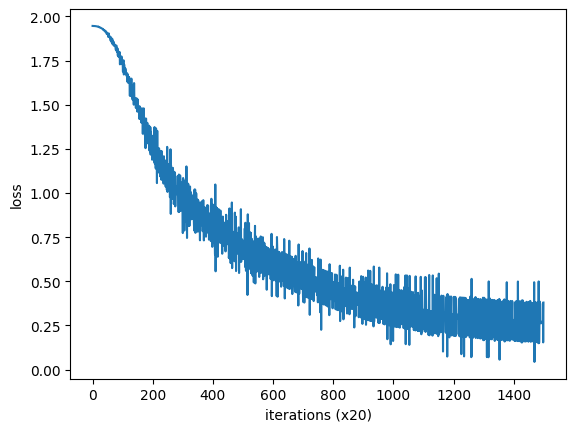

In [ ]:
import sys
sys.path.append('./deep')
from common.trainer import Trainer
from common.optimizer import Adam
from ch03.simple_cbow import SimpleCBOW
from common.util import preprocess, create_contexts_target, convert_one_hot

window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1500

text = 'you say goodbye and i say hello.'

corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()





In [ ]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

you [ 1.1090091 -1.7867426  1.7174811 -1.0160195  1.0291378]
say [-0.17975925  0.07680688  1.2786231   1.6458082  -1.2431886 ]
goodbye [ 0.806836   0.6570946 -0.4644009 -1.3090628  1.3595823]
and [ 1.5489386  -1.4106457   0.40529364  1.5623816  -1.7307192 ]
i [ 0.8031628   0.63671684 -0.47340846 -1.3390301   1.3755308 ]
hello [ 1.1049299 -1.7701104  1.7295774 -1.0001227  1.0242158]
. [-1.392039   1.4598447  1.4359978  1.2208991  1.7867857]


In [ ]:
import sys
sys.path.append('./deep')
import numpy as np
# coding: utf-8
from common.layers import MatMul, SoftmaxWithLoss, softmax      # 필요한 레이어 클래스들 임포트


class SimpleSkipGram:
    """
    간단한 Skip-gram 모델 클래스
    중심 단어로부터 주변 단어들을 예측하는 모델 (CBOW의 반대)
    """
    def __init__(self, vocab_size, hidden_size):
        """
        Skip-gram 모델 초기화
        Args:
            vocab_size: 어휘 사전 크기 (단어 개수)
            hidden_size: 은닉층 크기 (임베딩 차원)
        """
        V, H = vocab_size, hidden_size                  # 변수명 간소화

        # 가중치 초기화 (작은 랜덤 값으로 초기화)
        W_in = 0.01 * np.random.randn(V, H).astype('f')  # 입력 가중치 (어휘크기 × 은닉크기)
        W_out = 0.01 * np.random.randn(H, V).astype('f') # 출력 가중치 (은닉크기 × 어휘크기)

        # 레이어 생성
        self.in_layer = MatMul(W_in)                    # 입력층: 중심 단어를 임베딩으로 변환
        self.out_layer = MatMul(W_out)                  # 출력층: 임베딩을 점수로 변환
        self.loss_layer1 = SoftmaxWithLoss()           # 첫 번째 컨텍스트 단어 예측을 위한 손실층
        self.loss_layer2 = SoftmaxWithLoss()           # 두 번째 컨텍스트 단어 예측을 위한 손실층

        # 모든 가중치와 그래디언트를 리스트로 관리
        layers = [self.in_layer, self.out_layer]       # 가중치를 가진 레이어들
        self.params, self.grads = [], []               # 파라미터와 그래디언트 리스트 초기화
        for layer in layers:                           # 각 레이어별로
            self.params += layer.params                # 파라미터 추가
            self.grads += layer.grads                  # 그래디언트 추가

        # 학습된 단어 임베딩 벡터 저장 (W_in과 동일한 참조)
        self.word_vecs = W_in

    def forward(self, contexts, target):
        """
        순전파: 중심 단어로부터 컨텍스트 단어들을 예측
        Args:
            contexts: 컨텍스트 단어들 (batch_size, 2, vocab_size)
            target: 중심 단어 (batch_size, vocab_size)
        Returns:
            loss: 총 손실값
        """
        h = self.in_layer.forward(target)              # 중심 단어를 임베딩으로 변환
        s = self.out_layer.forward(h)                  # 임베딩을 각 단어의 점수로 변환
        print("s :", s)
        print("contexts :", contexts)
        l1 = self.loss_layer1.forward(s, contexts[:, 0])  # 첫 번째 컨텍스트 단어 예측 손실
        l2 = self.loss_layer2.forward(s, contexts[:, 1])  # 두 번째 컨텍스트 단어 예측 손실
        loss = l1 + l2                                 # 총 손실 = 두 컨텍스트 단어 예측 손실의 합
        return loss

    def backward(self, dout=1):
        """
        역전파: 그래디언트 계산 및 전파
        Args:
            dout: 상위층에서 전달된 그래디언트 (기본값: 1)
        """
        dl1 = self.loss_layer1.backward(dout)          # 첫 번째 손실층의 역전파
        dl2 = self.loss_layer2.backward(dout)          # 두 번째 손실층의 역전파
        ds = dl1 + dl2                                 # 두 손실의 그래디언트 합산
        dh = self.out_layer.backward(ds)               # 출력층의 역전파
        self.in_layer.backward(dh)                     # 입력층의 역전파 (가중치 업데이트)
        return None
    
    def predict(self, contexts):
        print("contexts :", contexts)
        h = self.in_layer.forward(contexts)
        s = self.out_layer.forward(h)
        probs = softmax(s)
        return probs


# 예시: 중심 단어 3개, 주변 단어 2개씩, vocab_size=7
targets = np.array([
    [0, 1, 0, 0, 0, 0, 0],  # "say"
    [0, 0, 1, 0, 0, 0, 0],  # "goodbye"
    [0, 0, 0, 0, 1, 0, 0],  # "i"
])
contexts = np.array([
    [
        [1, 0, 0, 0, 0, 0, 0],  # "you"
        [0, 0, 1, 0, 0, 0, 0],  # "goodbye"
    ],
    [
        [0, 1, 0, 0, 0, 0, 0],  # "say"
        [0, 0, 0, 1, 0, 0, 0],  # "and"
    ],
    [
        [0, 0, 1, 0, 0, 0, 0],  # "goodbye"
        [0, 0, 0, 0, 1, 0, 0],  # "i"
    ],
])

model = SimpleSkipGram(7, 3)

s : [[ 1.25750664e-04  2.70980517e-04  5.08640109e-05 -2.74940535e-05
   2.83593339e-04 -7.05188270e-05 -2.07451966e-04]]
contexts : [[[1 0 0 0 0 0 0]
  [0 0 1 0 0 0 0]]]
| epoch 1 |  iter 1 / 3 | time 0[s] | loss 3.89
s : [[-0.00010987  0.0002657   0.00038688 -0.00025814  0.00022057  0.00018079
  -0.00037268]]
contexts : [[[0 0 1 0 0 0 0]
  [0 0 0 0 1 0 0]]]
s : [[ 1.02009753e-04  1.37718190e-04  3.69821284e-05 -1.32882567e-04
   2.69556975e-05  1.47260087e-04 -2.82221533e-04]]
contexts : [[[0 1 0 0 0 0 0]
  [0 0 0 1 0 0 0]]]
s : [[ 0.00020169  0.00026743  0.00014775 -0.00012283  0.00027964 -0.00011978
  -0.00036043]]
contexts : [[[1 0 0 0 0 0 0]
  [0 0 1 0 0 0 0]]]
| epoch 2 |  iter 1 / 3 | time 0[s] | loss 3.89
s : [[ 1.21952091e-04  1.44047281e-04  2.38616896e-05 -1.22088025e-04
   1.02002208e-05  1.24632916e-04 -3.07696777e-04]]
contexts : [[[0 1 0 0 0 0 0]
  [0 0 0 1 0 0 0]]]
s : [[-2.25470962e-04  1.82020741e-04  5.43300071e-04 -3.50441129e-04
   3.28398671e-04  5.22488629e-05 -

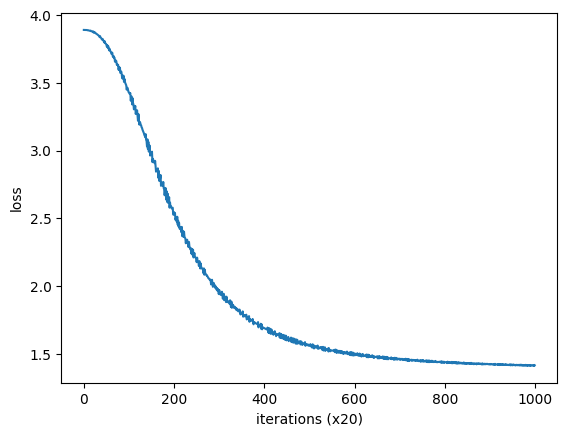

In [ ]:
from common.trainer import Trainer
from common.optimizer import Adam

optimizer = Adam()
trainer = Trainer(model, optimizer)

# contexts, target은 (batch, 2, vocab_size), (batch, vocab_size) 형태로 준비
trainer.fit(contexts, targets, max_epoch=1000, batch_size=1)
trainer.plot()

In [ ]:
import numpy as np
from common.functions import softmax

w_out = model.predict(np.array([[0,1,0,0,0,0,0]]))
print(w_out)

predicted_idx = np.argmax(w_out, axis=1)

print(predicted_idx)
id_to_word = {0: "you", 1: "say", 2: "goodbye", 3: "and", 4: "i", 5: "hello", 6: "."}
print(id_to_word[predicted_idx[0]])

word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])
    
    

contexts : [[0 1 0 0 0 0 0]]
[[0.4933161  0.00138738 0.49501374 0.00134404 0.00492225 0.00203776
  0.00197872]]
[2]
goodbye
you [ 0.02301363 -0.01345554 -0.00300953]
say [-1.1062658 -1.3676382 -1.1171803]
goodbye [ 1.138623  -1.1878552  1.1523983]
and [-0.00485494 -0.00884702 -0.00337897]
i [-1.1221783  1.3359745 -1.142588 ]
hello [-0.01830318  0.02091238  0.0094053 ]
. [-0.00593917 -0.01508985 -0.01668812]
